# Chapter 04) 다양한 분류 알고리즘

## 04-2. 확률적 경사 하강법

"가중치와 절편을 유지하면서 새로운 데이터에 대해 업데이트만 할 순 없을까?"

훈련 데이터가 한 번에 준비되는 게 아니라 조금씩 전달되는 문제 \
→ **점진적 학습** 또는 **온라인 학습**으로 해결(모델이 새로운 데이터를 받으면 즉시 학습에 반영하여 지속적으로 업데이트될 수 있는 방법)\
대표적인 점진적 학습 알고리즘 : **확률적 경사 하강법**
- ML, DL 알고리즘을 훈련하는 방법 (최적화하는 방법) → 이 자체가 머신러닝 알고리즘은 아님!!

확률적 경사 하강법\
'확률적' : 무작위하게, 랜덤하게 → 전체 샘플을 사용하지 않고 딱 **하나의 샘플**을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾음\
'하강법' : 내려가는 방법

최적점을 건너뛸 수도 있기 때문에 조금씩, 천천히 내려와야 함

에포크(epoch) : 모델이 훈련 데이터 전체를 한 번 모두 사용하여 학습하는 반복 단위
- 데이터셋 전체를 한 번 학습하는 것 = 1 에포크
- 1 에포크를 다 쓰면 훈련세트가 텅 비어 → 훈련세트에 샘플을 모두 채우고 다시 시작(경사 하강법은 수십, 수백 번 이상 에포크 수행함)

**미니배치 경사 하강법** : 무작위로 여러 개의 샘플을 선택해서 경사 하강법을 수행하는 방식 → 개수; 하이퍼파라미터\
**배치 경사 하강법** : 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용하는 방식 → 안정적(but, 메모리 문제 있을 수 있어)

### 손실 함수

어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지(나쁜 정도)를 측정하는 기준 → 값이 작을수록 좋아

분류는 원래 정확도를 측정.
but 손실 함수는 정확도처럼 뚝뚝 끊기는 걸 사용할 수 없어. 연속적인, 미분가능한 함수

- 분류 > 로지스틱 손실 함수 > 성능은 정확도로 확인, 최적화는 로지스틱 손실 함수로
- 회귀 > **평균 절댓값 오차**, **평균 제곱 오차** 사용 가능 > 손실함수 = 측정지표

- 손실 함수와 비용 함수\
비용 함수는 손실 함수의 다른 말입니다. 엄밀히 말하면 손실 함수는 **샘플 하나에 대한 손실**을 정의하고 비용 함수는 훈련 세트에 있는 **모든 샘플에 대한 손실 함수의 합**을 말합니다.

#### 로지스틱 손실 함수

이진 크로스엔트로피 손실 함수라고도 부름.\
로지스틱 손실 함수는 실제 클래스와 예측 확률 간의 차이를 측정합니다.\
로지스틱 손실 함수는 다음과 같이 정의됩니다:
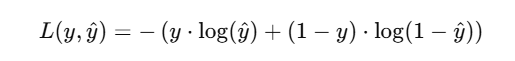
- 함수 동작 원리
이 함수는 실제 클래스가 1일 때와 0일 때 각각 다른 로그 손실을 적용합니다:\
실제 클래스 𝑦=1일 때: 손실 함수는 −log⁡(𝑦^)가 됩니다. 이 경우, 모델이
𝑦^를 1에 가깝게 예측할수록 손실이 작아집니다.\
실제 클래스 𝑦=0일 때: 손실 함수는 −log(1−𝑦^)가 됩니다. 이 경우, 모델이
𝑦^를 0에 가깝게 예측할수록 손실이 작아집니다.\
즉, 이 함수는 예측 확률이 실제 클래스에 가까울수록 손실이 낮아지고, 반대로 예측 확률이 실제 클래스에서 멀어질수록 손실이 커지도록 설계되어 있습니다.
또한 **타깃은 무조건 1로 바뀌어 곱해지므로** 따로 쓰지 않습니다.

- 로지스틱 손실 함수의 특징\
 **비선형성**: 손실이 커지면 모델이 잘못 예측한 것으로 간주됩니다. 예측이 더 틀릴수록 로그 함수로 인해 손실이 매우 커지며, 이는 모델 학습에 강한 패널티로 작용합니다.\
 **확률적 해석 가능**: 로지스틱 손실 함수는 모델의 출력이 확률처럼 동작하게 하며, 이는 분류 결과에 대한 확률적인 해석을 가능하게 만듭니다.\
 **미분 가능**: 손실 함수는 연속적이고 미분 가능하여, 경사하강법 같은 최적화 기법을 사용할 수 있습니다.

- 다중 분류 > 크로스엔트로피 손실 함수 사용
- 회귀 > 평균 절댓값 오차, 평균 제곱 오차(MSE) 사용

손실 함수를 정의하는 이유?\
모델의 성능을 측정하고, 이를 바탕으로 모델을 최적화하여 더 나은 성능을 달성하기 위해서입니다. 손실 함수는 모델이 얼마나 잘 예측했는지를 수치적으로 나타내며, 학습 과정에서 이 값을 최소화하려는 방향으로 모델의 파라미터(예: 가중치)를 조정하게 됩니다.

### SGDClassifier(확률적 경사 하강법을 이용한 분류 모델)

In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [ ]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
# 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
# 매개변수 loss : 손실 함수의 종류 지정, max_iter : 수행할 에포크 횟수 지정
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) # log -> log_loss로 함수명 변경됨
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target)) # 정확도
print(sc.score(test_scaled, test_target)) # 정확도

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


오류 코드 : /usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(

: 설정한 최대 반복 횟수(max_iter)에 도달했지만, 모델이 아직 수렴하지 않았다는 의미 → max_iter 매개변수의 값을 늘려보자

In [ ]:
# 손실 함수에 대한 값은 ??
from sklearn.metrics import log_loss

# 예측 확률 계산
y_pred_proba = sc.predict_proba(test_scaled)

# log_loss 계산
loss = log_loss(test_target, y_pred_proba)
print("Log Loss on test data:", loss) # log_loss 1 이하가 좋음

Log Loss on test data: 2.750171177970782


In [ ]:
sc.partial_fit(train_scaled, train_target) # 학습된 모델에 새로운 데이터를 추가로 학습시키는 방식
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


- train_scaled와 train_target을 한꺼번에 모두 사용했으니 확률적 경사 하강법이 아닌 배치 경사 하강법 아닌가요?\
아닙니다. SGDClassifier 객체에 한 번에 훈련 세트 전체를 전달했지만 이 알고리즘은 전달한 훈련 세트에서 1개씩 샘플을 꺼내어 경사 하강법 단계를 수행합니다. 아쉽지만 SGDClassifier는 미니배치 경사 하강법이나 배치 하강법을 제공하지 않습니다.
(Keras나 PyTorch 등에서는 미니배치 경사 하강법을 기본적으로 지원함)

### 에포크와 과대/과소적합

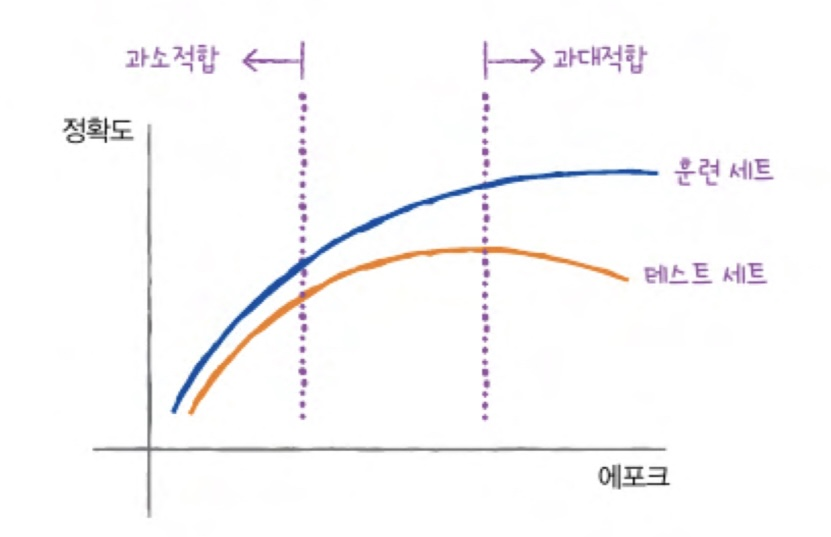

이 그래프는 에포크가 진행됨에 따라 모델의 정확도를 나타낸 것입니다. 훈련 세트 점수는 에포크가 진행될수록 꾸준히 증가하지만 테스트 세트 점수는 어느 순간 감소하기 시작합니다. 바로 이 지점이 모델이 과대적합되기 시작하는 곳입니다. 과대적합이 시작하기 전에 훈련을 멈추는 것을 **조기 종료**라고 합니다.

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [ ]:
# 300번의 에포크 동안 훈련 반복.
for _ in range(0, 300): # _는 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용하는 특별 변수.
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

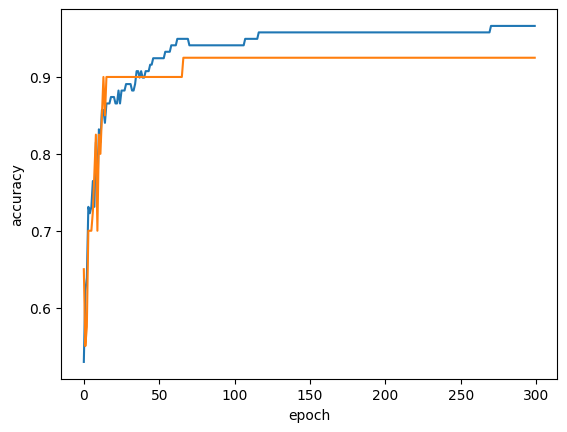

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_score) # 하늘색
plt.plot(test_score) # 주황색
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

백번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있음 → max_iter=100으로 설정하고 다시 훈련

In [ ]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42) # tol 매개변수는 모델 훈련을 언제 중단할지를 결정하는 기준을 설정. tol=None으로 설정되어 있어 조기 중단 없이, 지정한 최대 반복 횟수(max_iter)에 도달할 때까지 훈련을 진행
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춥니다.

SGDClassifier에서 tol의 기본값은 일반적으로 **1e-3**입니다. 이는 모델 성능의 개선이 0.001보다 작아지면 훈련을 조기에 멈추도록 설정된 것입니다. 따라서 tol=None으로 설정할 경우, 조기 중단 조건을 없애고 지정된 반복 횟수(max_iter)만큼 훈련을 진행하게 됩니다.

SGDClassifier에서 loss 매개변수의 기본값은 'hinge'입니다. 힌지 손실은 서포트 벡터 머신이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수입니다. 힌지 손실 함수는 **이진 분류 문제**에서 주로 사용되며, 특히 마진 최대화를 목표로 합니다. 이는 분류 경계에서 데이터 포인트들이 가능한 한 멀리 떨어져 있도록 학습시키는 방식입니다.

In [ ]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


# Chapter 05) 트리 알고리즘

## 05-1. 결정 트리

### 로지스틱 회귀로 와인 분류하기

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


- 누락된 값이 있으면 어떻게 하나요?\
누락된 값이 있다면 그 데이터를 버리거나 평균값으로 채운 후 사용할 수 있습니다. 어떤 방식이 최선인지는 미리 알기 어렵습니다. 두 가지 모두 시도해 보세요. 여기에서도 항상 훈련 세트의 통계 값으로 테스트 세트를 변환한다는 것을 잊지 마세요. 즉 훈련 세트의 평균값으로 테스트 세트의 누락된 값을 채워야 합니다.

In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
# 판다스 데이터프레임을 넘파이 배열로 바꾸기
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
print("♥")

♥


In [ ]:
# StandardScaler 사용하여 훈련 세트 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


훈련 세트, 테스트 세트의 점수가 모두 낮음 = 모델이 다소 과소적합됨\
→ **규제 매개 변수 C의 값을 바꾸**거나 **solver 매개변수에서 다른 알고리즘을 선택**하거나 **다항 특성을 만들어 추가**해보면?

In [ ]:
print(lr.coef_, lr.intercept_) # 이 숫자가 어떤 의미인지 설명하긴 어려움

[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


### 결정 트리
결정 트리(Decision Tree)는 트리 구조를 사용해 데이터의 특성(feature)을 기반으로 분류 또는 회귀 작업을 수행하는 지도 학습 알고리즘입니다. 간단하고 직관적이며, 설명력이 높아 다양한 분야에서 널리 사용됩니다.

- 결정 트리 모델을 만들 때 왜 random_state를 지정하나요?\
사이킷런의 결정 트리 알고리즘은 노드에서 최적의 분할을 찾기 전에 특성의 순서를 섞습니다. 따라서 약간의 무작위성이 주입되는데 실행할 때마다 점수가 조금씩 달라질 수 있기 때문입니다. 독자들이 실습한 결과와 책의 내용이 같도록 유지하기 위해 random_state를 지정하지만, **실전에서는 필요하지 않습니다.**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 세트
print(dt.score(test_scaled, test_target)) # 테스트 세트 # score 차이가 너무 커.. 과대적합 심각

0.996921300750433
0.8592307692307692


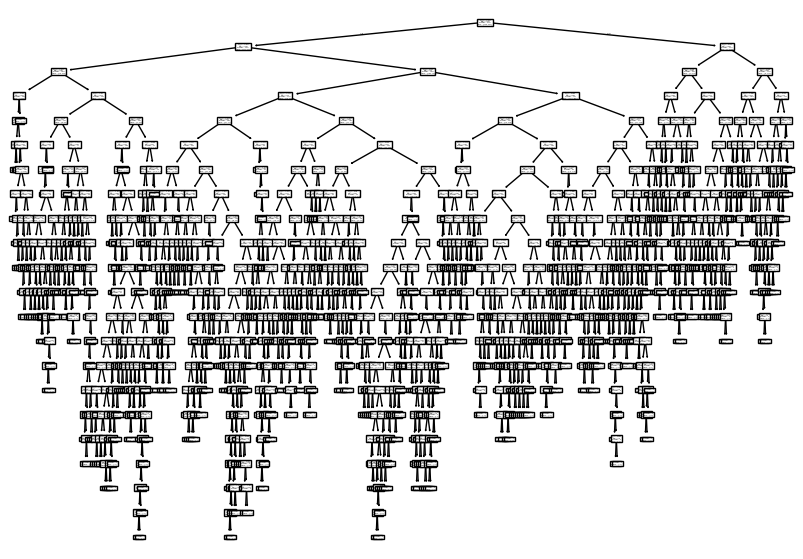

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

노드는 결정 트리를 구성하는 핵심 요소입니다. 노드는 훈련 데이터의 특성에 대한 테스트를 표현합니다.\
맨 위의 노드(node) : 루트 노드\
맨 아래 끝에 달린 노드 : 리프 노드


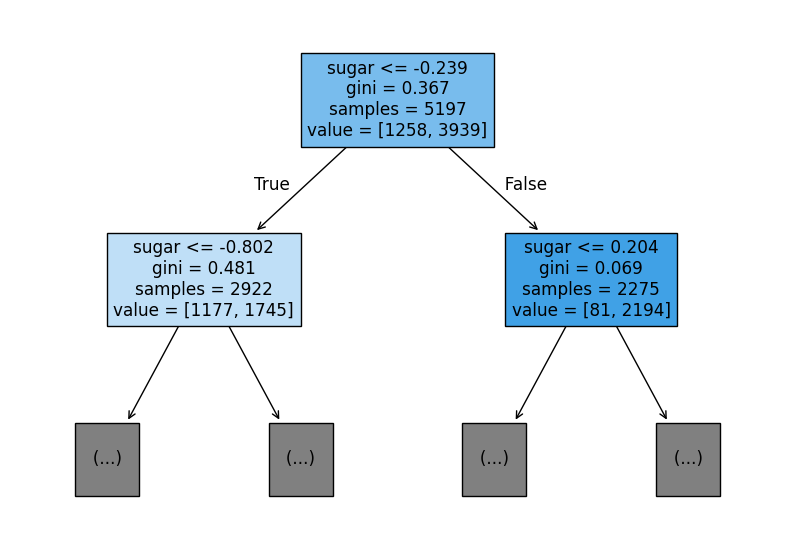

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- max_depth=1: 결정 트리의 깊이를 1로 제한하여 트리의 첫 번째 레벨만 보여줍니다. 이렇게 하면 첫 번째 조건, 즉 최상위 분할 기준이 무엇인지 쉽게 볼 수 있습니다.
- filled=True: 노드의 색상을 채워 주어 각 노드의 클래스 또는 분할 기준에 대한 시각적 구분을 더 명확히 보여줍니다. 색상은 일반적으로 각 클래스의 비율에 따라 변하며, 결정 기준값을 쉽게 확인할 수 있습니다.

samples : 총 샘플 수\
value = [ 음성 클래스 개수, 양성 클래스 개수]

결정 트리에서 예측하는 방법은 간단합니다. 리프 노드에서 가장 많은 클래스가 예측 클래스가 됩니다. 만약 이 결정 트리의 성장을 여기서 멈춘다면 왼쪽 노드에 도달한 샘플과 오른쪽 노드에 도달한 샘플은 모두 양성 클래스로 예측됩니다. 두 노드 모두 양성 클래스의 개수가 많기 때문이죠.

#### 불순도

gini는 지니 불순도(impurity)를 의미합니다. DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값이 'gini'입니다. criterion 매개변수의 용도는 노드에서 데이터를 분할할 기준을 정하는 것입니다. 앞의 그린 트리에서 루트 노드는 어떻게 당도 -0.239를 기준으로 왼쪽과 오른쪽 노드로 나누었을까요? 바로 criterion 매개변수에 지정한 지니 불순도를 사용합니다.

`지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)`

결정 트리 모델은 부모 노드와 자식 노드의 **불순도 차이가 가능한 크도록** 트리를 성장시킵니다.

**부모 노드와 자식 노드의 불순도 차이를 계산하는 방법**\
먼저 자식 노드의 불순도를 샘플 개수에 비례하여 모두 더합니다.\
그다음 부모 노드의 불순도에서 빼면 됩니다.

`불순도의 차이(정보 이득) = 부모의 불순도 - (왼쪽 노드 샘플 수 / 부모의 샘플 수) * 왼쪽 노드 불순도 - (오른쪽 노드 샘플 수 / 부모의 샘플 수) * 오른쪽 노드 불순도`

엔트로피 불순도
DecisionTreeClassifier 클래스에서 criterion='entropy'를 지정하여 엔트로피 불순도를 사용할 수 있습니다. 엔트로피 불순도도 노드의 클래스 비율을 사용하지만 지니 불순도처럼 제곱이 아니라 밑이 2인 로그를 사용하여 곱합니다.
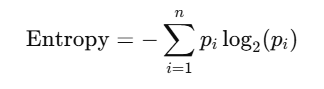

지니 불순도는 클래스 비율의 제곱을 이용하여 계산하며, 더 직관적으로 계산됩니다.\
엔트로피 불순도는 로그 함수가 포함되어 계산이 조금 더 복잡하지만, 데이터가 불균형할 때 분류 성능이 더 나아질 수 있습니다.

#### 가지치기
결정 트리의 성장을 제한하는 방법

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42) # 최대 3개의 노드까지만 성장
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


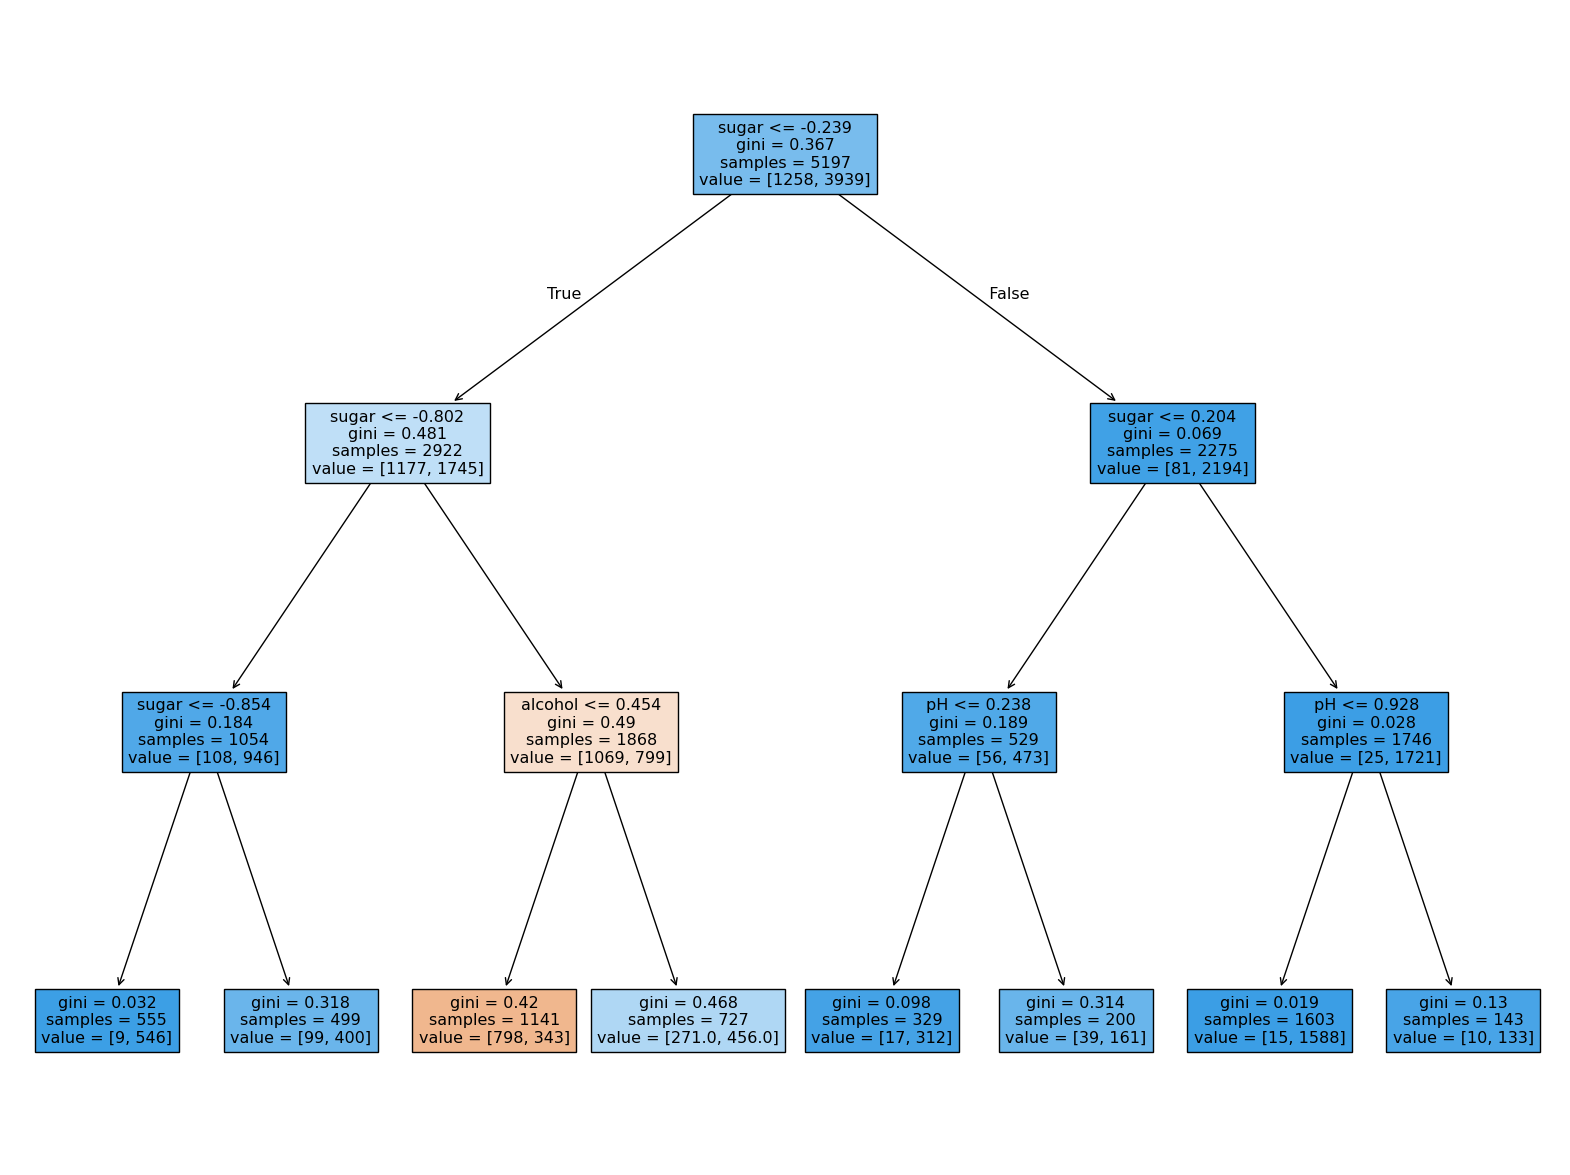

In [ ]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

앞서 불순도를 기준으로 샘플을 나눈다고 했습니다. 불순도는 클래스별 비율을 가지고 계산했죠. 샘플을 어떤 클래스 비율로 나누는지 계산할 때 특성값의 스케일이 계산에 영향을 미칠까요? 아니요, 특성값의 스케일은 결정 트리 알고리즘에 아무런 영향을 미치지 않습니다. 따라서 **표준화 전처리를 할 필요가 없습니다**. 이것이 결정 트리 알고리즘의 또 다른 장점 중 하나입니다.

In [ ]:
# 전처리하기 전의 훈련 세트와 테스트 세트로 결정 트리 모델을 다시 훈련 -> 결과 같음
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


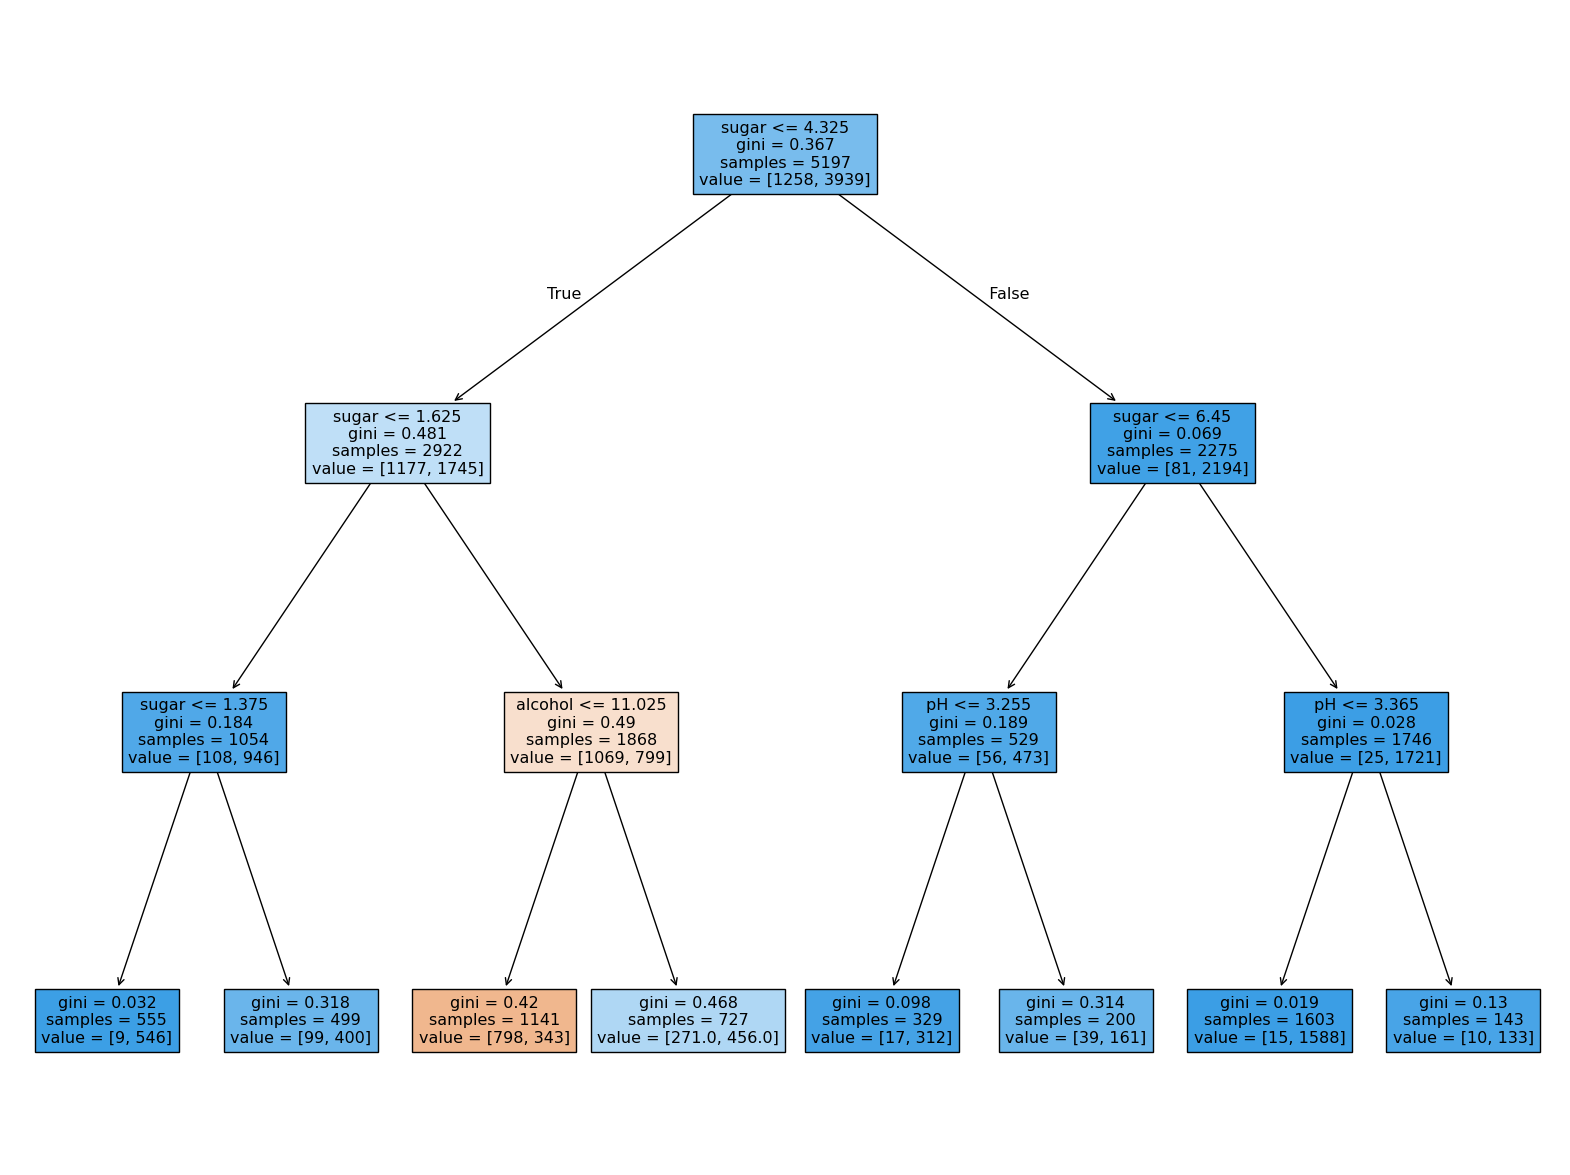

In [ ]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # 특성값을 표준점수로 바꾸지 않아, 이해하기 훨씬 쉬움
plt.show()

In [ ]:
print(dt.feature_importances_) # 특성 중요도 계산

[0.12345626 0.86862934 0.0079144 ]


feature_names=['alcohol', 'sugar', 'pH']에 대하여 특성 중요도 [0.12345626 0.86862934 0.0079144 ] > 당도가 가장 높음\
특성 중요도는 결정 트리에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값입니다.\
특성 중요도는 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산합니다. 특성 중요도를 활용하면 결정 트리 모델을 **특성 선택에 활용**할 수 있습니다. 이것이 결정 트리 알고리즘의 또 다른 장점 중 하나입니다.